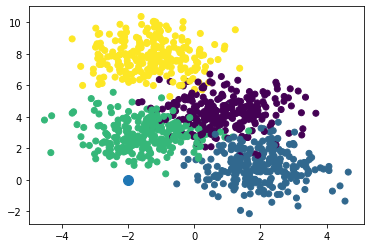

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=1000, centers=4, random_state=0)
point = np.array([-2, 0])

plt.scatter(X[:, 0], X[:, 1], c =y)
plt.scatter(point[0], point[1], s=100)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model = KNeighborsClassifier()

In [76]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
model.predict([point])

array([2])

In [78]:
class KNNCustom:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    def fit(self, X, y):
        self.__X = X   # double undersccore makes the variable primary
        self.__y = y
        
    def predict_point(self, point):
        distances = np.sqrt(((self.__X - point) ** 2).sum(axis=1))
        
        distances_indices = np.argsort(distances)
        
        near_indices = distances_indices[:self.n_neighbors]
        votes = self.__y[near_indices]
        values, counts = np.unique(votes, return_counts=True)
        return values[counts.argmax()]
    
    def predict(self, X):
        result = []
        for point in X:
            result.append(self.predict_point(point))
            
        return np.array(result)
    
    def score(self, X, y):
        yp = self.predict(X)
        
        return np.mean(yp == y)

In [79]:
model = KNNCustom(n_neighbors=15)

In [80]:
model.fit(X,y)

In [81]:
model.predict_point(point)

2

In [82]:
model.predict(X)

array([3, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 3, 1, 2, 2, 3, 0, 1, 2, 3,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 2, 0, 0, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 0, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 2, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0,
       2, 2, 3, 2, 2, 3, 0, 3, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 1,
       0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 0, 0, 1, 0, 3, 2, 1, 1, 0,
       2, 1, 0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0,
       2, 1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 3, 2, 0, 1, 1, 2, 3, 2, 3,
       2, 2, 0, 0, 3, 3, 1, 1, 2, 0, 3, 0, 0, 2, 3, 3, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 3, 2, 0, 0, 0, 3, 3, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 1, 2, 3, 3, 3, 1, 3, 0, 1,
       3, 2, 0, 2, 3, 1, 1, 0, 1, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 0, 3, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 1,

In [83]:
y

array([3, 0, 3, 2, 1, 0, 0, 1, 0, 0, 3, 1, 2, 3, 1, 2, 2, 3, 0, 1, 0, 3,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 0, 2, 2, 0, 0, 0, 2,
       3, 0, 0, 3, 2, 0, 1, 0, 0, 2, 3, 1, 0, 0, 3, 3, 1, 1, 2, 2, 2, 3,
       0, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 3, 2, 1,
       0, 0, 2, 3, 2, 2, 0, 2, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 2, 1, 1, 0,
       2, 0, 0, 0, 2, 0, 1, 3, 1, 3, 1, 0, 3, 3, 1, 0, 3, 3, 1, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0, 3, 3, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 3, 2, 0, 1, 1, 2, 3, 2, 3,
       2, 2, 2, 0, 3, 3, 1, 1, 2, 0, 3, 0, 3, 2, 0, 3, 2, 0, 0, 1, 1, 3,
       0, 0, 0, 3, 0, 0, 0, 2, 3, 3, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 3, 2, 2, 1, 2, 0, 3, 0, 1, 3, 0, 1,
       3, 2, 0, 2, 3, 1, 1, 0, 1, 2, 3, 3, 2, 3, 2, 0, 1, 3, 2, 0, 2, 2,
       2, 0, 2, 3, 1, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1,

In [84]:
model.score(X, y)

0.937

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [89]:
scores = []

for i in range(1, 100):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    
    scores.append(model.score(X_test, y_test))

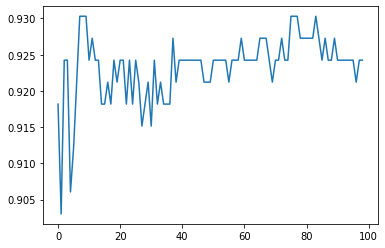

In [90]:
plt.plot(scores)

(0, 1)

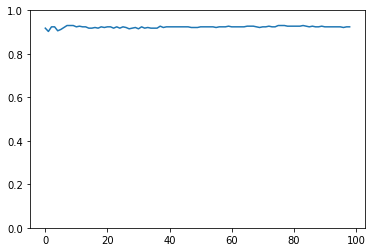

In [92]:
plt.plot(scores)
plt.ylim(0, 1)